# An analysis on select Ordinary Differential Equation solving methods and their respective accuracies

## 1.1: The Euler Method

### The General Problem

Consider the model for bacteria growth:

$$\frac{dx}{dt} = kx(t)$$

Where $k$ is defined as the growth constant and $x(t)$ is the number of bacteria at time $t$. Analytically, at any given time the number of bacteria present may be expressed as:

$$x(t) = x_{0} e^{kt}$$

Such that $x_{0}$ is the initial number of bacteria present at time $t=0$.

We wish to establish an algorithmic process to solve this differential equation numerically. As the derivative is of the form:

$$\frac{dx(t)}{dt} = F(t)$$

The Euler method may be applied. This technique uses explicit differencing to step the function from one value of $x$ to the next in short steps of the variable $t$. Recall that the derivative of this function may be given as:

$$\frac{x(t+h)-x(t)}{h} = x'(t) = kx(t)$$

Rearranging this yields the following:

$$x(t+h) = x(t) + hkx(t)$$

Provided $h$ is incremented sufficiently.

Below is the pseudocode for the Euler method along with a fully written Euler method function to solve this problem with set initial conditions. The `Euler_Soln` function takes in four inputs and outputs two arrays. The inputs for the function are, the step size $h$, the end time; what we wish the solution to end at, the initial population of bacteria $x_{0}$ and growth constant $k$.

In [71]:
#------------------------------------------------------------------------
#    function(stepsize, growthconst, timeend, initpop):
#        initialise variables(time,timelist,solutionlist)
#        while time is less than timeend:
#            add EulerMethod(x,stepsize,growthconst) to solutionlist
#            set x = EulerMethod(x,stepszie,growthconst)
#            increment time
#            add time to timelist
#        return timelist and solutionlist 
#------------------------------------------------------------------------

In [77]:
import numpy as np
import matplotlib.pyplot as plt

def bacteria_model(x0,k,t): # Analytical Basis, the function we are trying to model via the different methods
    """
    Args:
        x0: The initial population of bacteria, 10
        k: The growth constant, 0.1
        t: Time 
    Returns:
        The analytic solution at a given time "t"
    """
    return x0*np.exp(k*t)

def Euler_Soln(step_size, growth_const, t_end, init_pop): # Euler solution function definition
    """
    Args:
        step_size: The required step size given, this is effectively "h"
        growth_const: The given growth constant "k"
        t_end: The time we wish the model to run to, in our case t_end = 100
        init_pop: The initial population of the bacteria present "x0"
        
    Returns:
        t_values: The time incremented by the stepsize in a list format
        y_values: The corresponding solution at of the ODE at a set times dictated by t_values
    """
    t = 0
    t_values = [t]
    y_values = [init_pop]

    while t < t_end: # increments over the entire timespan 
        f_xh = init_pop + step_size*growth_const*init_pop # calc f(x+h) = f(x) + hf'(x)
        init_pop = f_xh # sets new f(x) = f(x+h)
        t += step_size # increments time
        y_values.append(f_xh) # adds f(x+h) to solution set
        t_values.append(t) # add corresponding time to solution set
    return t_values, y_values

t_theory = np.linspace(0,100,10000)
time_Euler, Numerical_Euler = Euler_Soln(1,0.1,100,10)

Using a step size of $h=1$, an initial population $x_{0} = 10$ and a growth constant of $k=0.1$ for a span of 100 seconds a graph of both the Euler method solution and analytic solution was constructed.

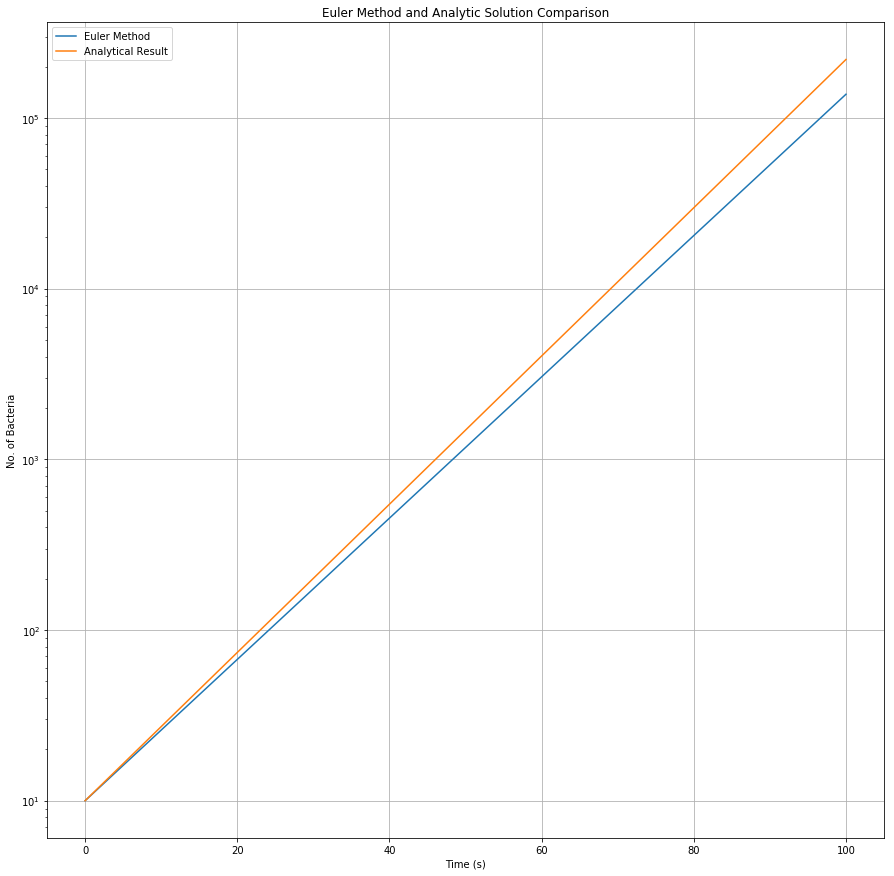

In [8]:
plt.figure(figsize=(15,15))
plt.plot(time_Euler, Numerical_Euler, label="Euler Method")
plt.plot(t_theory, bacteria_model(10,0.1,t_theory), label="Analytical Result")
plt.title("Euler Method and Analytic Solution Comparison")
plt.xlabel("Time (s)")
plt.ylabel("No. of Bacteria")
plt.yscale("log") # <~ to set axis scales
plt.legend()
plt.grid()
plt.show()

It can be seen from the above graph that the Euler solution diverges quite significantly from the analytical result as time progresses. The Euler solution does follow the general trend set by analytic result. To further assess the validity of this method values at $t=46$ were calculated with decreasing step sizes from 1 to 0.0001. A graph of the closeness of the numerical solution and corresponding accuracy was then constructed.

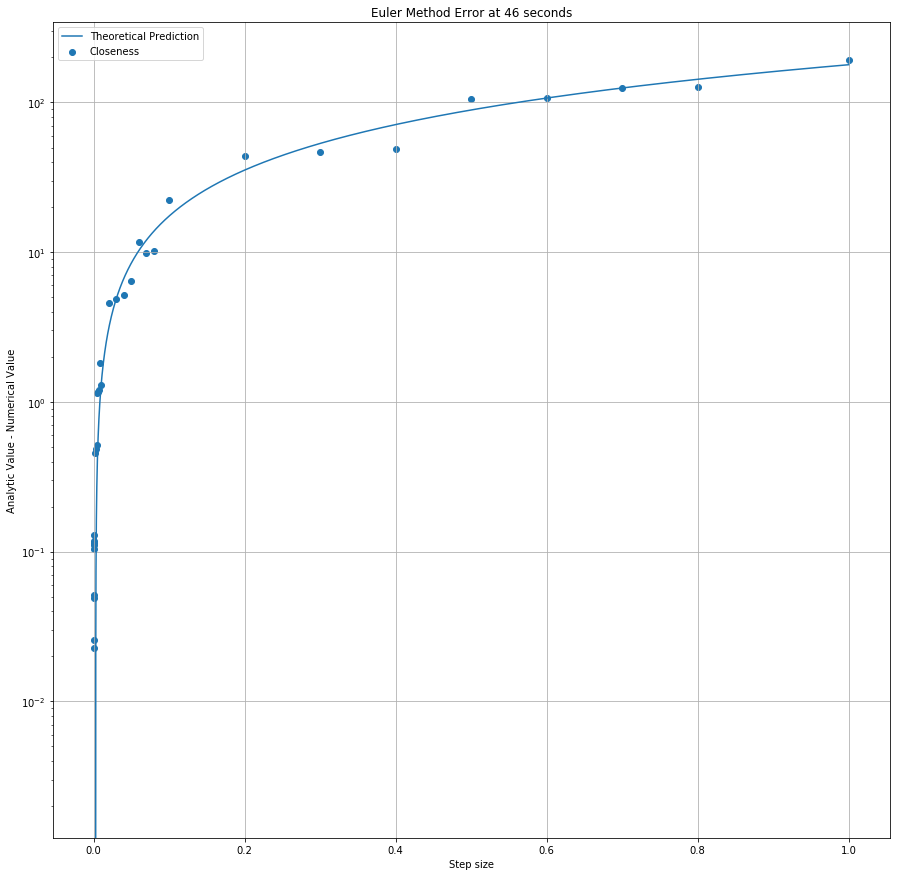

In [88]:
errors46 = []
accuracy = []

i = 0
while i < 5:
    myVar, value46 = Euler_Soln(10**(-i),0.1,46,10)
    errors46.append(np.abs(bacteria_model(10,0.1,46)-value46[-1])) # <~ Calcs error at t=46 for a variety of accuracies
    accuracy.append(10**(-i))
    if i > 0:
        n = 2
        while n < 9:
            myVar, value46 = Euler_Soln(n*10**(-i),0.1,46,10) # adds more values to accuracy
            errors46.append(np.abs(bacteria_model(10,0.1,46)-value46[-1])) 
            accuracy.append(n*10**(-i))
            n += 1
    i += 1

a, b  = np.polyfit(accuracy,errors46,1) #error law coefficients

Eerror_theory = np.linspace(0,1,10000)
    
plt.figure(figsize=(15,15))
plt.plot(Eerror_theory,a*Eerror_theory+b, label="Theoretical Prediction") #plots error law
plt.scatter(accuracy, errors46, label="Closeness") # <~ Plots accuracy against error
plt.title("Euler Method Error at 46 seconds")
plt.xlabel("Step size")
plt.ylabel("Analytic Value - Numerical Value")
plt.yscale("log")
plt.legend()
plt.grid()
plt.show()

It can be seen from the above that the difference between the analytical solution and numerical solution approach smaller and smaller values as the required step size decreases. A linear trendline was also applied to the dataset, this indicates that the error on the numerical solution converges linearly with the decrease in step size. The quality of the solution improves at a linear rate.

## 1.2: The Midpoint Method

The Midpoint method, otherwise known as the 2nd Order Runge-Kutta method, is another finite difference method that can also be utilised to solve the bacteria problem. The Midpoint method is expressed as:

$$k_{1} = hF(t_{n},x_{n}) $$

$$k_{2} = hF(t_{n} + h/2, x_{n} + k1/2) $$

$$x_{n+1} = x_{n} + k_{2} + O(h^{3})$$

Below is the pseudocode for the method described as well as a defined function which emulates the Midpoint method. `Runge2nd` takes in the same arguments as the Euler method and returns two arrays. 

In [ ]:
#------------------------------------------------------------------------
#    function(h, k, timeend, xn):
#        initialise variables(time,timelist,solutionlist)
#        while time is less than timeend:
#            set k1 = h*k*xn
#            set k2 = h*k(xn+k1/2)
#            add (xn+k2) to solutionlist
#            set xn = (xn+k2)
#            increment time
#            add time to timelist
#        return timelist and solutionlist 
#------------------------------------------------------------------------

In [80]:
def Runge2nd(step_size, growth_const, t_end, xn): # <~ Setup of Midpoint Method
    """
    Args:
        step_size: The required step size given, this is effectively "h"
        growth_const: The given growth constant "k"
        t_end: The time we wish the model to run to, in our case t_end = 100
        xn: The initial population of the bacteria present "x0"
        
    Returns:
        t_values: The time incremented by the stepsize in a list format
        y_values: The corresponding solution at of the ODE at a set times dictated by t_values
    """
    t = 0
    t_values = [t]
    y_values = [xn]

    while t < t_end:
        k1 = step_size*growth_const*xn # calcs k1 = hF(xn)
        k2 = step_size*growth_const*(xn+k1/2) # calcs k2 = hF(xn+k1/2)
        x_n1 = xn + k2 # calcs x_n+1 = xn + k2
        xn = x_n1
        t += step_size
        y_values.append(x_n1)
        t_values.append(t)
    return t_values, y_values

time_Runge2nd, Numerical_Runge2nd = Runge2nd(1,0.1,100,10)

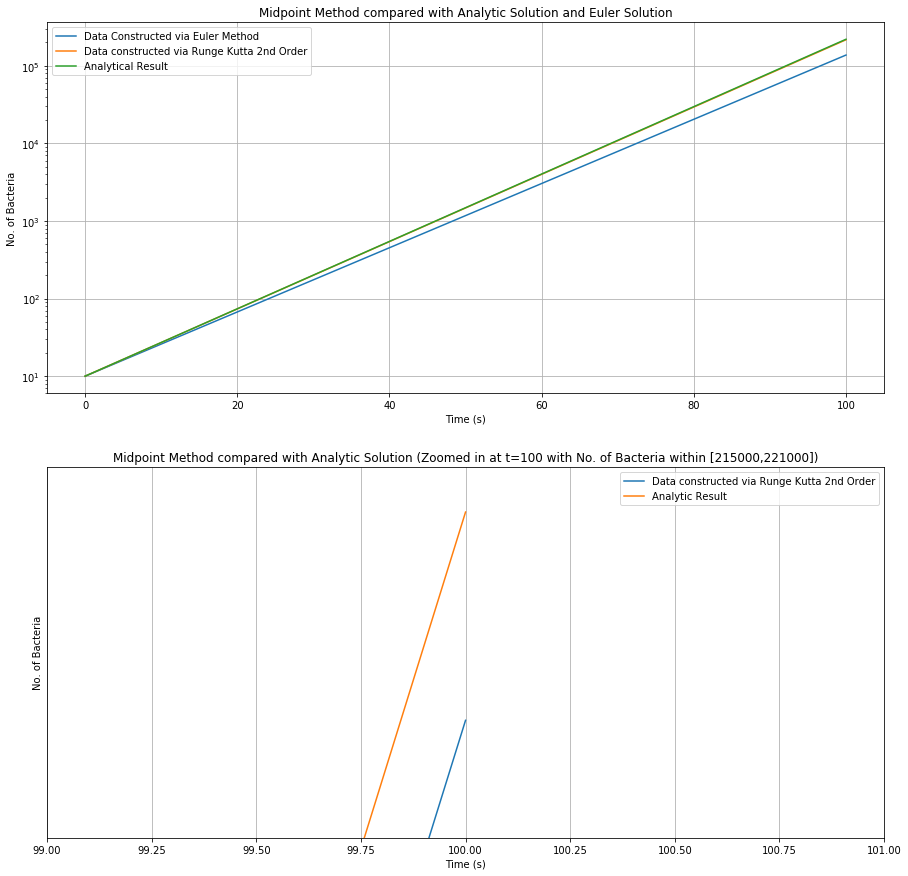

In [82]:
plt.figure(figsize=(15,15))
plt.subplot(2,1,1)
plt.plot(time_Euler,Numerical_Euler,label="Data Constructed via Euler Method") # plots the euler numerical solution
plt.plot(time_Runge2nd, Numerical_Runge2nd, label="Data constructed via Runge Kutta 2nd Order") # plots the midpoint solution
plt.plot(t_theory, bacteria_model(10,0.1,t_theory), label="Analytical Result") # plots the analytical result
plt.title("Midpoint Method compared with Analytic Solution and Euler Solution")
plt.xlabel("Time (s)")
plt.ylabel("No. of Bacteria")
plt.legend()
plt.yscale("log")
plt.grid()

## plots a zoomed in view
plt.subplot(2,1,2)
plt.plot(time_Runge2nd, Numerical_Runge2nd, label="Data constructed via Runge Kutta 2nd Order") # <~ Gives zoomed in view to illustrate Midpoint is more accurate than Euler
plt.plot(t_theory, bacteria_model(10,0.1,t_theory), label="Analytic Result")
plt.title("Midpoint Method compared with Analytic Solution (Zoomed in at t=100 with No. of Bacteria within [215000,221000])")
plt.xlabel("Time (s)")
plt.ylabel("No. of Bacteria")
plt.legend()
plt.yscale("log")
plt.xlim(99,101)
plt.ylim(215000,221000)
plt.grid()
plt.show()

It can be seen from above that the midpoint method drastically improves the numerical solution and approximates considerably better than the Euler method. This method still diverges from the analytical solution however but at a much slower rate compared to the Euler method. In order to show the method diverges at extreme values of time a zoomed in view is also provided above.

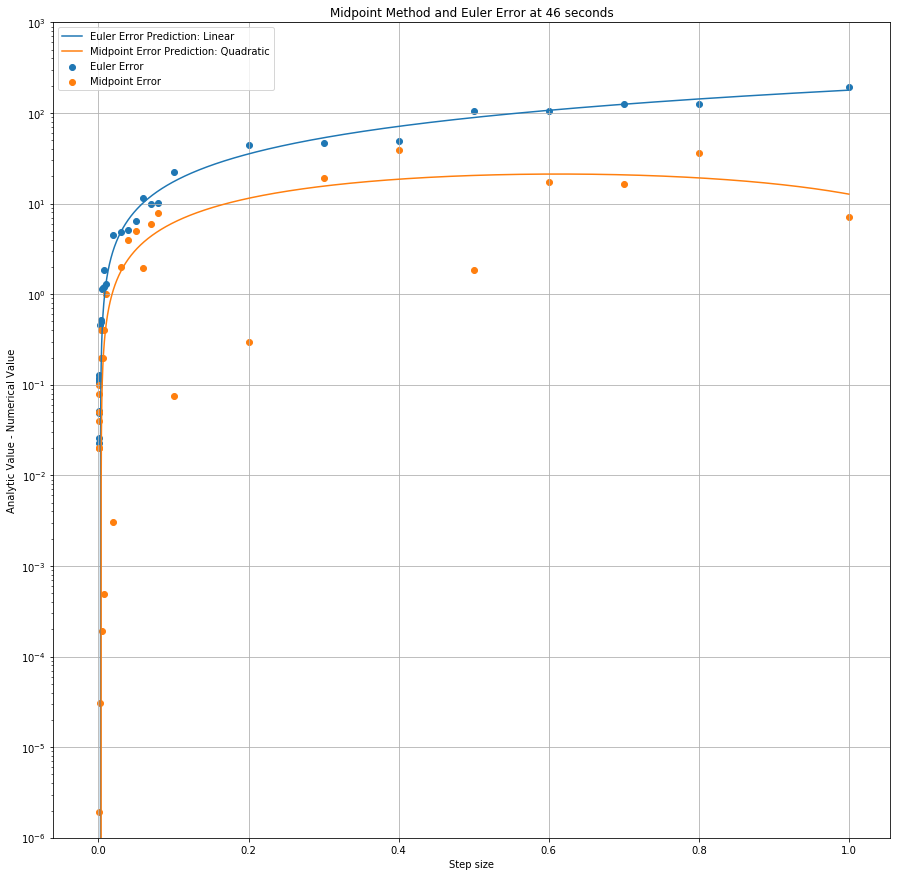

In [89]:
errors46_runge2 = []
accuracy_runge2 = []

i = 0
while i < 5:
    myVar, value46 = Runge2nd(10**(-i),0.1,46,10)
    errors46_runge2.append(np.abs(bacteria_model(10,0.1,46)-value46[-1]))
    accuracy_runge2.append(10**(-i))
    if i > 0:
        n = 2
        while n < 9:
            myVar, value46 = Runge2nd(n*10**(-i),0.1,46,10)
            errors46_runge2.append(np.abs(bacteria_model(10,0.1,46)-value46[-1]))
            accuracy_runge2.append(n*10**(-i))
            n += 1
    i += 1
    
    
a,b,c = np.polyfit(accuracy_runge2,errors46_runge2,2) #midpoint error law coefs
e,f = np.polyfit(accuracy,errors46,1) # euler midpoint error law coef

a_theory = np.linspace(-0.01,1,10000)
b_theory = np.linspace(-0.01,1,10000)

plt.figure(figsize=(15,15))
plt.plot(b_theory, e*b_theory + f, label="Euler Error Prediction: Linear") #plots euler error law
plt.plot(a_theory, a*a_theory**2+b*a_theory+c, label="Midpoint Error Prediction: Quadratic") # plots midpoint error law
plt.scatter(accuracy,errors46, label="Euler Error")
plt.scatter(accuracy_runge2, errors46_runge2, label="Midpoint Error") # shows a quadratic law
plt.title("Midpoint Method and Euler Error at 46 seconds")
plt.xlabel("Step size")
plt.ylabel("Analytic Value - Numerical Value")
plt.yscale("log")
plt.ylim(10**-6, 1000)
plt.legend()
plt.grid()
plt.show()

It is evident from the above that the difference between the analytical solution and Midpoint numerical solution approach smaller and smaller values as the required step size decreases. This converges at a quicker rate compared to the Euler method. This convergence may be modelled quadratically. 

## 1.3: Runge-Kutta 4th order Method

There exists higher order Runge-Kutta methods which could also be utilised to solve the bacteria problem. The most optimum of the Runge-Kutta methods for this problem is the 4th Order Runge-Kutta or RK4 method. The RK4 method may be expressed by the following finite difference method:

$$k_{1} = hF(t_{n},x_{n}) $$

$$k_{2} = hF(t_{n} + h/2, x_{n} + k_{1}/2) $$

$$k_{3} = hF(t_{n} + h/2, x_{n} + k_{2}/2) $$

$$k_{4} = hF(t_{n} + h, x_{n} + k_{3}) $$

$$x_{n+1} = x_{n} + \frac{1}{6}k_{1} + \frac{1}{3}k_{2} + \frac{1}{3}k_{3} + \frac{1}{6}k_{4} + O(h^{5}) $$

Below is the pseudocode for the RK4 method as well as a defined function which simulates the RK4 method in action to solve the bacteria problem. `Runge4th` takes in the same arguments as the `Euler_Soln` and `Runge2nd` functions and returns two arrays. 

In [ ]:
#------------------------------------------------------------------------
#    function(h, k, timeend, xn):
#        initialise variables(time,timelist,solutionlist)
#        while time is less than timeend:
#            set k1 = h*k*xn
#            set k2 = h*k(xn+k1/2)
#            set k3 = h*k*(xn+k2/2)
#            set k4 = h*k*(xn+k3)
#            add (xn+k1/6+k2/3+k3/3+k4/6) to solutionlist
#            set xn = (xn+k1/6+k2/3+k3/3+k4/6)
#            increment time
#            add time to timelist
#        return timelist and solutionlist 
#------------------------------------------------------------------------

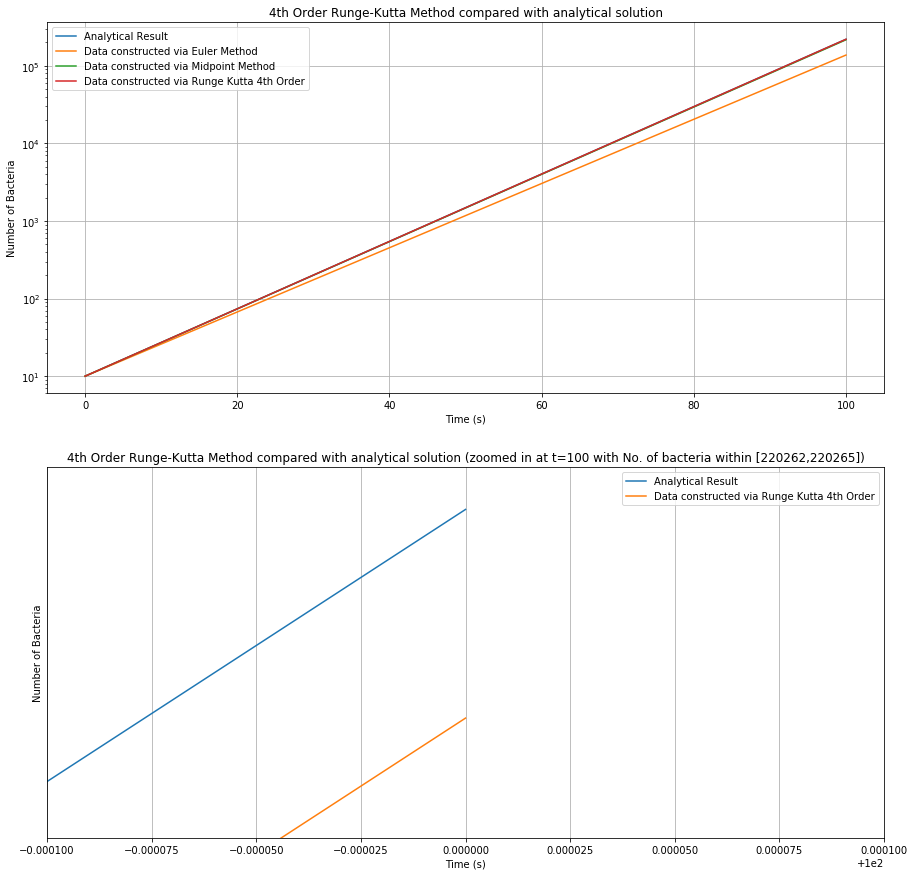

In [72]:
def Runge4th(step_size, growth_const, t_end, xn): # <~ Setup for 4th order runge_kutta, same method/ process as 2nd but a lil more terms
    """
    Args:
        step_size: The required step size given, this is effectively "h"
        growth_const: The given growth constant "k"
        t_end: The time we wish the model to run to, in our case t_end = 100
        xn: The initial population of the bacteria present "x0"
        
    Returns:
        t_values: The time incremented by the stepsize in a list format
        y_values: The corresponding solution at of the ODE at a set times dictated by t_values
    """
    t = 0
    t_values = [t]
    y_values = [xn]

    while t < t_end:
        k1 = step_size*growth_const*xn # k1 = hF(xn)
        k2 = step_size*growth_const*(xn+k1/2) # k2 = hF(xn+k1/2)
        k3 = step_size*growth_const*(xn+k2/2) # k3 = hF(xn+k2/2)
        k4 = step_size*growth_const*(xn+k3) # k4 = hF(xn+k3)
        x_n1 = xn + k1/6 + k2/3 + k3/3 + k4/6 # final step in 4th order runge kutta
        xn = x_n1
        t += step_size
        y_values.append(x_n1)
        t_values.append(t)
    return t_values, y_values
    
time_Runge4th, Numerical_Runge4th = Runge4th(1,0.1,100,10)  
    
plt.figure(figsize=(15,15))
plt.subplot(2,1,1)
plt.plot(t_theory, bacteria_model(10,0.1,t_theory), label="Analytical Result") #plot analytical result
plt.plot(time_Euler,Numerical_Euler, label="Data constructed via Euler Method") # plots euler numerical result
plt.plot(time_Runge2nd,Numerical_Runge2nd, label="Data constructed via Midpoint Method") # plots midpoint numerical result
plt.plot(time_Runge4th, Numerical_Runge4th, label="Data constructed via Runge Kutta 4th Order") # plots RK4 numerical result
plt.title("4th Order Runge-Kutta Method compared with analytical solution")
plt.xlabel("Time (s)")
plt.ylabel("Number of Bacteria")
plt.yscale("log")
plt.legend()
plt.grid()

# plots zommed in view
plt.subplot(2,1,2)
plt.plot(t_theory, bacteria_model(10,0.1,t_theory), label="Analytical Result")
plt.plot(time_Runge4th, Numerical_Runge4th, label="Data constructed via Runge Kutta 4th Order")
plt.title("4th Order Runge-Kutta Method compared with analytical solution (zoomed in at t=100 with No. of bacteria within [220262,220265])") # <~ Shows accuracy kinda
plt.xlabel("Time (s)")
plt.ylabel("Number of Bacteria")
plt.yscale("log")
plt.xlim(99.9999,100.0001)
plt.ylim(220262,220265)
plt.legend()
plt.grid()
plt.show()

From the above it is clear that the RK4 method is far more accurate than the Midpoint and Euler methods. The result still diverges from the analytical result at the most extreme case, as $t$ tends to considerably larger numbers the solution will diverge yet again. A zoomed in plot is given to illustrate that the numerical and analytic solutions are in very good accordance with one another. 

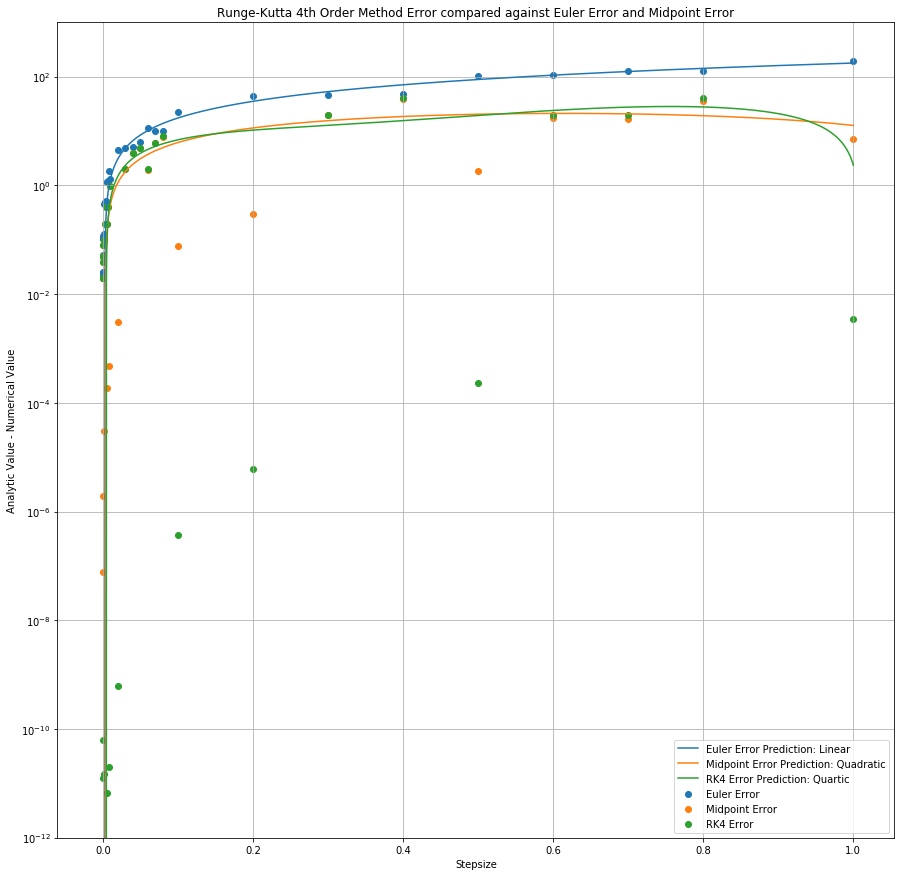

In [76]:
errors46_runge4 = []
accuracy_runge4 = []

i = 0
while i < 5:
    myVar, value46 = Runge4th(10**(-i),0.1,46,10)
    errors46_runge4.append(np.abs(bacteria_model(10,0.1,46)-value46[-1]))
    accuracy_runge4.append(10**(-i))
    if i > 0:
        n = 2
        while n < 9:
            myVar, value46 = Runge4th(n*10**(-i),0.1,46,10)
            errors46_runge4.append(np.abs(bacteria_model(10,0.1,46)-value46[-1]))
            accuracy_runge4.append(n*10**(-i))
            n += 1
    i += 1
    
c_theory = np.linspace(0,1,10000)

h,i,j,k,l = np.polyfit(accuracy_runge4,errors46_runge4,4) # error law coefs for RK4 method

plt.figure(figsize=(15,15))
plt.plot(b_theory, e*b_theory + f, label="Euler Error Prediction: Linear")
plt.plot(a_theory, a*a_theory**2+b*a_theory+c, label="Midpoint Error Prediction: Quadratic")
plt.plot(c_theory, h*c_theory**4+i*c_theory**3+j*c_theory**2+k*c_theory+l, label="RK4 Error Prediction: Quartic")
plt.scatter(accuracy,errors46, label="Euler Error")
plt.scatter(accuracy_runge2, errors46_runge2, label="Midpoint Error")
plt.scatter(accuracy_runge4, errors46_runge4, label="RK4 Error") # displays a quartic law
plt.title("Runge-Kutta 4th Order Method Error compared against Euler Error and Midpoint Error")
plt.xlabel("Stepsize")
plt.ylabel("Analytic Value - Numerical Value")
plt.yscale("log")
plt.ylim(10**-12, 1000)
plt.legend()
plt.grid()
plt.show()

It can be seen that the difference between the analytical value and numerical value for the RK4 method converges very quickly as the stepsize is decreased. This is an improvement over the Midpoint method. There is diminishing returns for using more complicated finite difference schemes once an optimum solution is found. In this case, there is very little good in using the RK4 method for this set as it is well approximated by the Midpoint method.
The Midpoint method is the optimal choice for computing performance as it is significantly coherent with the analytic result compared to the Euler result whilst being less impactive on the computer resources compared to the RK4 method. 
For a significantly larger timespan the RK4 method would triumph over the Midpoint method as it converges quicker to a more accurate result.

## 2.1 Euler method on 2nd order ODE

The Euler method may be extended to 2nd order ordinary differential equations. Consider a mass bouncing on a spring in a frictionless environment. The equation of motion for a mass $m$, moving in the $x$-direction under the action of Hooke's Law restoring force provided by a spring of spring constant $k$ is:

$$\frac{d^{2}x}{dt^{2}} = -\frac{k}{m}x$$. 

The solution of this equation requires knowledge of two initial conditions, namely $x(0) = x_{0}$ and $x'(0) = v_{0}$, and is given by:

$$x(t) = x_{0} \cos\left( \sqrt{\frac{k}{m}}t \right)$$

This equation may be decomposed into two different first order differential equations, namely:

$$\frac{dx}{dt} = v$$

and

$$\frac{dv}{dt} = -\frac{k}{m}x$$

Utilising the Euler method on both equations would yield a reasonable numerical solution to the initial differential equation. The goodness of the solution may also be assessed via the conservation of energy theorem. In this case the energy of the system is given by:

$$E = \frac{1}{2}kx^{2} + \frac{1}{2}mv^{2}$$

If the object is moving in a frictionless environment it can be expected that energy would be conserved. Below is the pseudocode to solve such a problem with the addition of a full function to solve the differential equation. 

In [ ]:
#------------------------------------------------------------------------
#    function(h, k, m, timeend, xn, vn):
#        initialise variables(time,timelist,positionlist,velocitylist,energylist)
#        while time is less than timeend:
#            set xn1 = xn + h*vn
#            set vn1 = vn + h*(-k/m)*xn
#            set xn = xn1
#            set vn = vn1
#            set E = energycalc(k,m,xn,vn)
#            increment time
#            add time to timelist
#            add xn to positionlist
#            add vn to velocitylist
#            add E to energylist
#        return timelist and solutionlist 
#------------------------------------------------------------------------

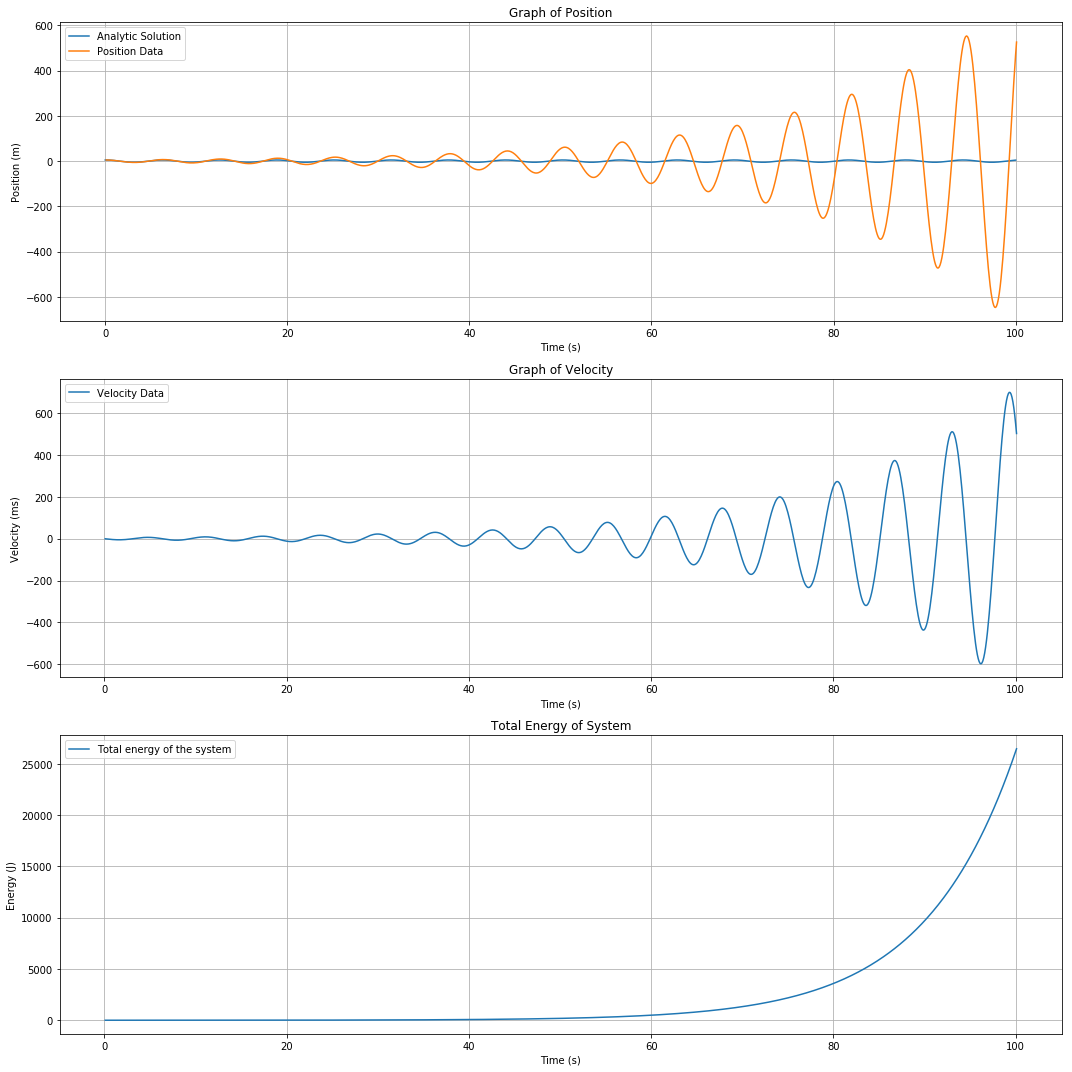

In [85]:
t_theory = np.linspace(0,100,10000)

def motion(init_pos, spring_const, mass, time):
    """
    Args:
        init_pos: The initial position of the object
        spring_const: The given spring constant "k"
        mass: The mass of the object
        time: The time we wish to calculate the position at
        
    Returns:
        The position of the object at time "t" analytically
    """
    return init_pos*np.cos(time*np.sqrt(spring_const/mass))

def Euler_Soln2ndOrder(step_size, spring_const, mass, xn, vn, t_end):
    """
    Args:
        init_pos: The initial position of the object
        spring_const: The given spring constant "k"
        mass: The mass of the object
        time: The time we wish to calculate the position at
        
    Returns:
        time: list of times incremented by step_size
        position: list of positions at increments of time
        velocity: list of velocities at increments of time
        energy: list of total energies of the system at increments of time
    """
    t = 0
    time = []
    position = []
    velocity = []
    energy = []

    while t < t_end:
        x_th = xn + step_size*vn # x(t+h) = x(t) + hx'(t)
        v_th = vn + step_size*(-spring_const/mass)*xn # v(t+h) = v(t) + hv'(t)
        xn = x_th
        vn = v_th
        t += step_size
        E = 0.5*spring_const*xn**2 + 0.5*mass*vn**2 # calcs energy of system
        time.append(t)
        position.append(xn)
        velocity.append(vn)
        energy.append(E)
    return time, position, velocity, energy
    
time, position, velocity, energy = Euler_Soln2ndOrder(0.1,0.1,0.1,5,0,100)
    
plt.figure(figsize=(15,15))
plt.subplot(3,1,1)
plt.plot(t_theory, motion(5,0.1,0.1,t_theory),label="Analytic Solution") # plots analytical positional data
plt.plot(time, position, label="Position Data") # plots numerical positional data
plt.title("Graph of Position")
plt.xlabel("Time (s)")
plt.ylabel("Position (m)")
plt.legend()
plt.grid()

plt.subplot(3,1,2)
plt.plot(time, velocity, label="Velocity Data") # plots numerical velocity data
plt.title("Graph of Velocity")
plt.xlabel("Time (s)")
plt.ylabel("Velocity (ms)")
plt.legend()
plt.grid()

plt.subplot(3,1,3)
plt.plot(time, energy, label=("Total energy of the system")) # plots total energy of system
plt.title("Total Energy of System")
plt.ylabel("Energy (J)")
plt.xlabel("Time (s)")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

From the bottom graph it is evident that the energy within the system is not conserved which leads to the positional data being considerably off the analytical result for a large timespan. Upon analysing the results from the Euler method, it is clear that for a more true accuracy over a large timespan the increment size must be lesser.

To ensure the script runs as intended the example calculation from the lecture slides is also given. In this case $h = 0.1$, $k = 0.1$, $m=1$, $x_{0}=10$, $v_{0} = 0$ and an end time of 100 seconds.

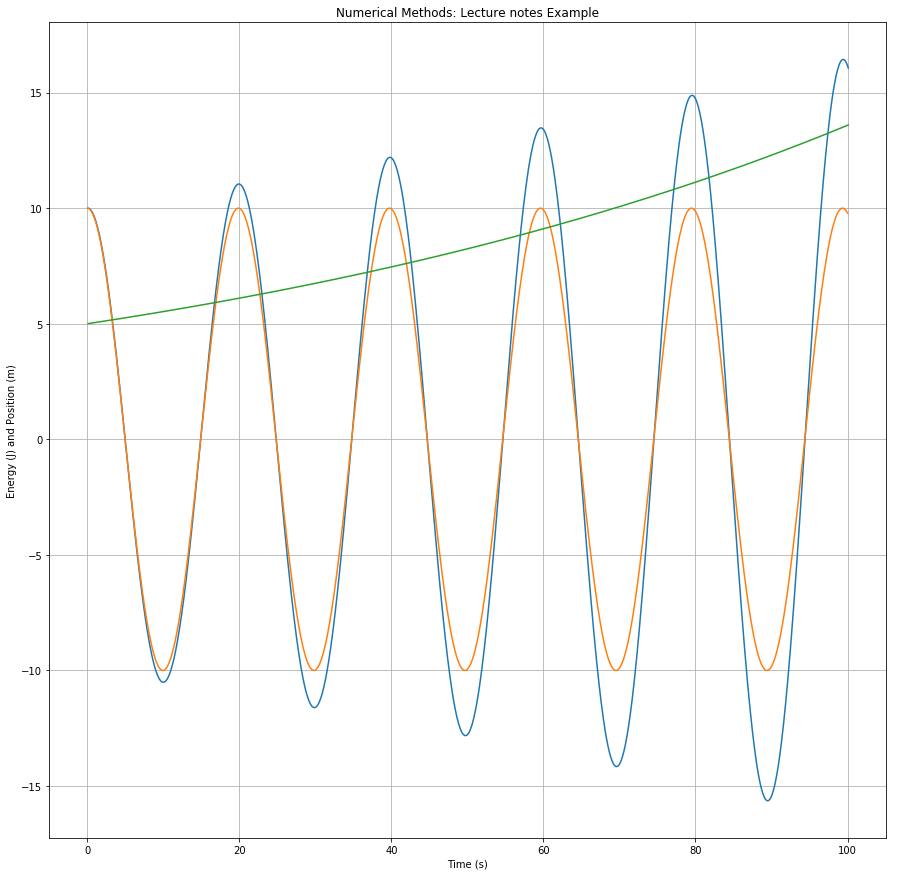

In [86]:
time_lec, position_lec, velocity_lec, energy_lec = Euler_Soln2ndOrder(0.1,0.1,1,10,0,100)

# plots example from lecture notes

plt.figure(figsize=(15,15))
plt.plot(time_lec, position_lec, label="Euler Prediction")
plt.plot(t_theory, motion(10,0.1,1,t_theory), label="Analytical Result")
plt.plot(time_lec, energy_lec, label="Total Energy within system")
plt.title("Numerical Methods: Lecture notes Example")
plt.xlabel("Time (s)")
plt.ylabel("Energy (J) and Position (m)")
plt.grid()
plt.show()

To illustrate the assumption of decreasing step size yields a more accurate result is true the step size was decreased by set increments then plotted against the analytic solution for position.

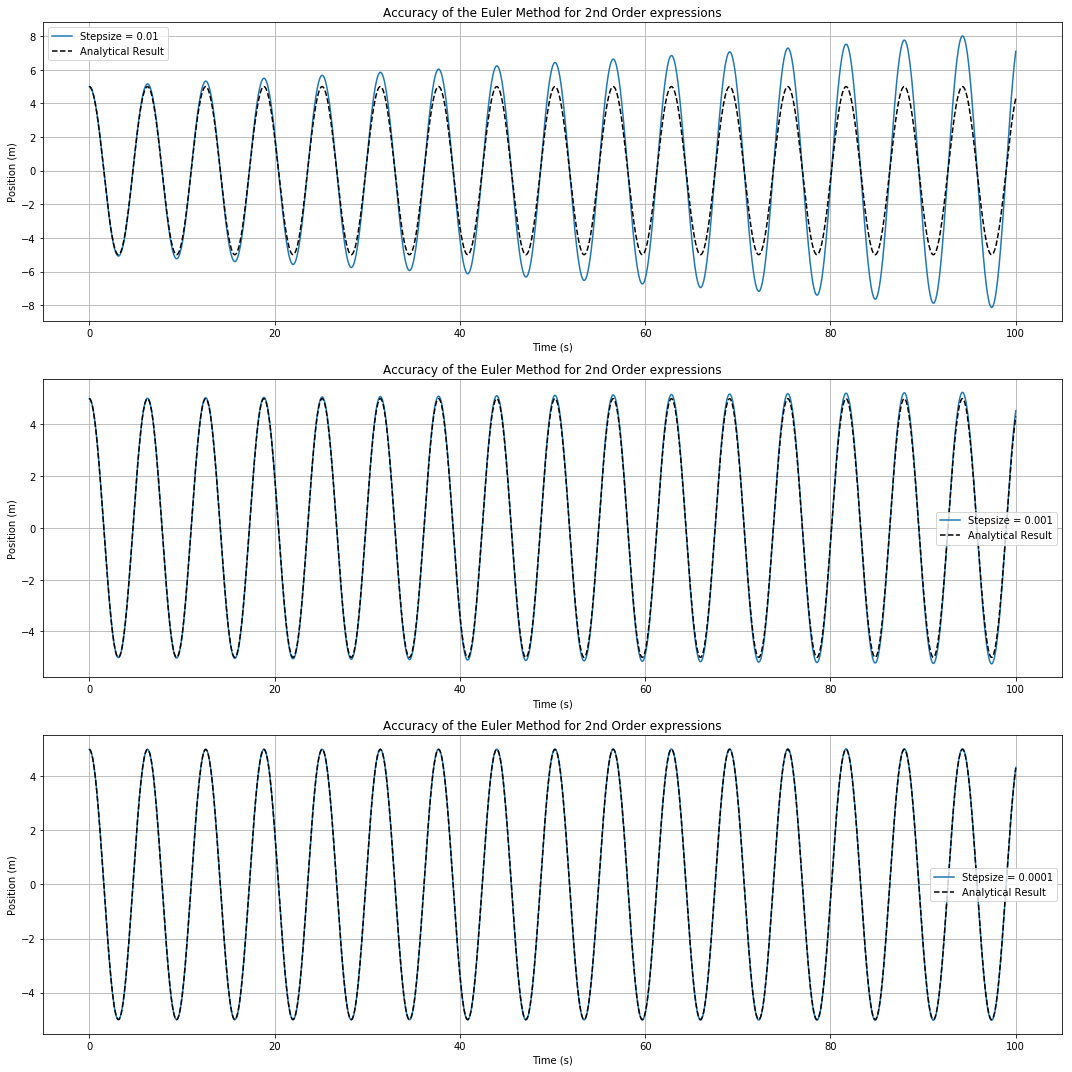

In [87]:
times = []
positions = []
velocities = []
energies = []

i = 0
while i < 3:
    time, position, velocity, energy = Euler_Soln2ndOrder(0.01*10**(-i),0.1,0.1,5,0,100) # iterates over a reqd set of accuracies
    times.append(time)
    positions.append(position)
    velocities.append(velocity)
    energies.append(energy)
    i += 1
    
plt.figure(figsize=(15,15))
plt.subplot(3,1,1)
plt.plot(times[0], positions[0], label="Stepsize = 0.01") #plots result of stepsize 0.01
plt.plot(t_theory, motion(5,0.1,0.1,t_theory), label="Analytical Result", color="black", linestyle="--")
plt.title("Accuracy of the Euler Method for 2nd Order expressions")
plt.xlabel("Time (s)")
plt.ylabel("Position (m)")
plt.legend()
plt.grid()

plt.subplot(3,1,2)
plt.plot(times[1], positions[1], label="Stepsize = 0.001") #plots result of stepsize 0.001
plt.plot(t_theory, motion(5,0.1,0.1,t_theory), label="Analytical Result", color="black", linestyle="--")
plt.title("Accuracy of the Euler Method for 2nd Order expressions")
plt.xlabel("Time (s)")
plt.ylabel("Position (m)")
plt.legend()
plt.grid()

plt.subplot(3,1,3)
plt.plot(times[2], positions[2], label="Stepsize = 0.0001") #plots result of stepsize 0.0001
plt.plot(t_theory, motion(5,0.1,0.1,t_theory), label="Analytical Result", color="black", linestyle="--")
plt.title("Accuracy of the Euler Method for 2nd Order expressions")
plt.xlabel("Time (s)")
plt.ylabel("Position (m)")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

From the graphs constructed it is evident that a stepsize of around 0.0001 would yield a coherent solution in comparision to the analytic solution. Thus it can be stated that for the Euler method, the smaller the stepsize the greater the numerical solution is like the analytic solution. 